In [25]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt 
from sklearn.metrics import classification_report

### 1. load data

In [2]:
data = pd.read_csv('bike_data.csv', header=0)
data.drop(['Unnamed: 0'], axis=1, inplace=True)
data.head()

,breakdown,cumTime,cumDist,cumRide,cumBreak,intensity,meanDist,age,summer
0,1,14910,1398094,458,1,93,3052,54,0
1,1,1281,189910,78,1,148,2434,62,0
2,1,8324,769168,332,3,92,2316,57,1
3,1,31610,2988819,949,1,94,3149,105,1
4,1,5587,518114,176,1,92,2943,41,1


### 2. feature selection

In [3]:
#독립변수 % 종속변수 정의
X = data.drop('breakdown', axis=1, inplace=False)
y = data['breakdown']

### 3. KNN model fitting

In [5]:
#데이터 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)


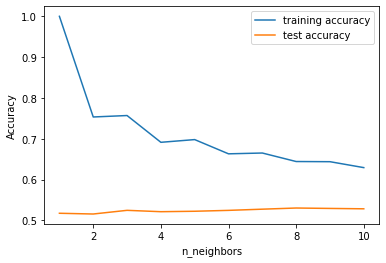

In [9]:
training_accuracy = []
test_accuracy = []

# 이웃의 수가 1~10일 때 검증
neighbors_settings = range(1, 11)

for n_neighbors in neighbors_settings:
    # 데이터 학습
    knn = KNeighborsClassifier(n_neighbors=n_neighbors)
    knn.fit(X_train, y_train)

    # 훈련데이터 정확도
    training_accuracy.append(knn.score(X_train, y_train))

    # 테스트데이터 정확도
    test_accuracy.append(knn.score(X_test, y_test))

plt.plot(neighbors_settings, training_accuracy, label="training accuracy")
plt.plot(neighbors_settings, test_accuracy, label="test accuracy")

plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()

plt.savefig('ml_knn_compare_model')


이웃의 수가 늘수록 training data의 정확도는 떨어지고 test data의 정확도는 올라감 <br>
적당한 fitting을 위해 neighbors의 수는 7로 결정

In [17]:
#데이터 학습
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train, y_train)

#성능평가
print('training set 정확도: {:.2f}'.format(knn.score(X_train, y_train)))
print('test set 정확도: {:.2f}'.format(knn.score(X_test, y_test)))

training set 정확도: 0.67
test set 정확도: 0.53


### 4. k-fold cross validation

In [15]:
kfold = model_selection.KFold(n_splits=10, random_state=7, shuffle=True)
modelCV = KNeighborsClassifier(n_neighbors=7)
scoring = 'accuracy'
results = model_selection.cross_val_score(modelCV, X_train, y_train, cv=kfold, scoring=scoring)
print("10-fold cross validation average accuracy: %.3f" % (results.mean()))

10-fold cross validation average accuracy: 0.514


### 5. confusion matrix

In [16]:
y_pred = knn.predict(X_test)

In [20]:
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[3205 2797]
 [2871 3127]]


In [23]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.53      0.53      0.53      6002
           1       0.53      0.52      0.52      5998

    accuracy                           0.53     12000
   macro avg       0.53      0.53      0.53     12000
weighted avg       0.53      0.53      0.53     12000



### 6. ROC curve

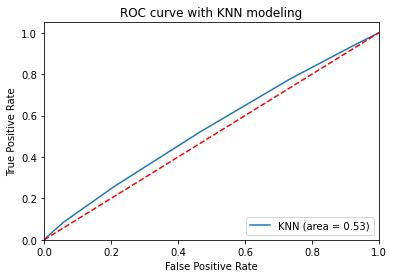

In [24]:
knn_roc_auc = roc_auc_score(y_test, y_pred)
fpr, tpr, thresholds = roc_curve(y_test, knn.predict_proba(X_test)[:,1])

plt.figure()
plt.plot(fpr, tpr, label='KNN (area = %0.2f)' % knn_roc_auc)
plt.plot([0, 1], [0, 1],'r--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.title('ROC curve with KNN modeling')
plt.legend(loc="lower right")
plt.savefig('ml_KNN_ROC')
plt.show()